In [2]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy.stats import moment
from scipy.stats import skew
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy. stats import poisson
import scipy.stats as st
from scipy import stats
import scipy as sc
from scipy.stats import pearsonr


In [3]:
df = pd.read_excel('df.xlsx')

In [4]:
df.head()

,Период T,Общ число людей побывавших в бк,t между отход и приход за кассу,общ t проведенное в бк,общ t заказа,общ t в очереде
0,60,73,1.037841,21.775624,1.290972,7.260948
1,60,73,1.321676,24.989560,3.731170,11.498853
2,60,73,3.455660,30.918678,4.056782,13.306931
3,60,73,4.014782,23.426742,1.147883,8.456784
4,60,73,2.924994,24.276738,1.141822,12.067165


In [5]:
df.tail()

,Период T,Общ число людей побывавших в бк,t между отход и приход за кассу,общ t проведенное в бк,общ t заказа,общ t в очереде
54,60,73,0.243837,20.751542,10.163080,6.447295
55,60,73,1.206761,15.182660,1.675927,10.873178
56,60,73,6.503840,18.616947,1.059256,11.200884
57,60,73,2.213139,30.068445,2.268670,15.198435
58,60,73,2.342367,27.214756,1.692486,11.260639


## Мат. ожидание

**Ручное решение**

In [6]:
m1 = np.sum(df['t между отход и приход за кассу'])/len(df['t между отход и приход за кассу'])
m2 = np.sum(df['общ t проведенное в бк'])/len(df['общ t проведенное в бк'])
m3 = np.sum(df['общ t заказа'])/len(df['общ t заказа'])
m4 = np.sum(df['общ t в очереде'])/len(df['общ t в очереде'])



print('M[x] t между отход и приход за кассу:', m1)
print('M[x] общ t проведенное в бк:', m2)
print('M[x] общ t заказа:', m3)
print('M[x] общ t в очереде:', m4)

M[x] t между отход и приход за кассу: 2.0358878379031933
M[x] общ t проведенное в бк: 23.589131619679595
M[x] общ t заказа: 3.428044656171858
M[x] общ t в очереде: 10.192835494267563


## Дисперсия

**Проверка с помощью функции**

In [7]:
print(np.var(df['t между отход и приход за кассу']))
print(np.var(df['общ t проведенное в бк']))
print(np.var(df['общ t заказа']))
print(np.var(df['общ t в очереде']))

1.9155248945580956
19.812204903620714
6.2504770411869535
10.120037486653656


**Ручное решение**

In [8]:
d1 = (np.sum((df['t между отход и приход за кассу'])**2)/59) - (m1**2)

d2 = (np.sum((df['общ t проведенное в бк'])**2)/59) - (m2**2)

d3 = (np.sum((df['общ t заказа'])**2)/59) - (m3**2)

d4 = (np.sum((df['общ t в очереде'])**2)/59) - (m4**2)

print('D[x] t между отход и приход за кассу:', d1)
print('D[x] общ t проведенное в бк:', d2)
print('D[x] общ t заказа:', d3)
print('D[x] общ t в очереде:', d4)

D[x] t между отход и приход за кассу: 1.9155248945580956
D[x] общ t проведенное в бк: 19.812204903620795
D[x] общ t заказа: 6.250477041186958
D[x] общ t в очереде: 10.12003748665363


## Исправленая дисперсия

In [9]:
s1 = (len(df)/(len(df)-1))*d1
print('1)','Для [t между отход и приход за кассу]: ','\n','Обычная D =       ', d1, '\n', 'исправленная S^2 =',s1, '\n')

s2 = (len(df)/(len(df)-1))*d2
print('2)','Для [общ t проведенное в бк]: ','\n','Обычная D =       ', d2, '\n', 'исправленная S^2 =',s2, '\n')

s3 = (len(df)/(len(df)-1))*d3
print('3)','Для [общ t заказа]: ','\n','Обычная D =       ', d3, '\n', 'исправленная S^2 =',s3, '\n')

s4 = (len(df)/(len(df)-1))*d4
print('4)','Для [общ t в очереде]: ','\n','Обычная D =       ', d4, '\n', 'исправленная S^2 =',s4, '\n')

1) Для [t между отход и приход за кассу]:  
 Обычная D =        1.9155248945580956 
 исправленная S^2 = 1.9485511858435798 

2) Для [общ t проведенное в бк]:  
 Обычная D =        19.812204903620795 
 исправленная S^2 = 20.153794643338394 

3) Для [общ t заказа]:  
 Обычная D =        6.250477041186958 
 исправленная S^2 = 6.358243886724663 

4) Для [общ t в очереде]:  
 Обычная D =        10.12003748665363 
 исправленная S^2 = 10.294520891595932 



## Стандартое отклонение

**Проверка с помощью функции**

In [10]:
std1 = statistics.stdev(df['t между отход и приход за кассу'])
std2 = statistics.stdev(df['общ t проведенное в бк'])
std3 = statistics.stdev(df['общ t заказа'])
std4 = statistics.stdev(df['общ t в очереде'])

print(std1)
print(std2)
print(std3)
print(std4)

1.3959051493004744
4.489297789558887
2.521555846441768
3.208507580105735


**Ручное решение**

In [11]:
srz1 = math.sqrt(d1)
srz2 = math.sqrt(d2)
srz3 = math.sqrt(d3)
srz4 = math.sqrt(d4)

print('Стандартное отклонение для  t между отход и приход за кассу', srz1)
print('Стандартное отклонение для  общ t проведенное в бк', srz2)
print('Стандартное отклонение для  общ t заказа', srz3)
print('Стандартное отклонение для  общ t в очереде', srz4)

Стандартное отклонение для  t между отход и приход за кассу 1.3840248894286893
Стандартное отклонение для  общ t проведенное в бк 4.451090305039968
Стандартное отклонение для  общ t заказа 2.5000954064169147
Стандартное отклонение для  общ t в очереде 3.1812006360262206


## Исправленное стандартное отклонение

In [12]:
c1 = math.sqrt(s1)
print('1)','Для [t между отход и приход за кассу]: ','\n','Обычная srz =     ', srz1, '\n', 'исправленная srz =',c1, '\n')

c2 = math.sqrt(s2)
print('1)','Для [общ t проведенное в бк]: ','\n','Обычная srz =     ', srz1, '\n', 'исправленная srz =',c2, '\n')

c3 = math.sqrt(s3)
print('1)','Для [общ t заказа]: ','\n','Обычная srz =     ', srz1, '\n', 'исправленная srz =',c3, '\n')

c4 = math.sqrt(s4)
print('1)','Для [общ t в очереде]: ','\n','Обычная srz =     ', srz1, '\n', 'исправленная srz =',c4, '\n')

1) Для [t между отход и приход за кассу]:  
 Обычная srz =      1.3840248894286893 
 исправленная srz = 1.3959051493004744 

1) Для [общ t проведенное в бк]:  
 Обычная srz =      1.3840248894286893 
 исправленная srz = 4.489297789558896 

1) Для [общ t заказа]:  
 Обычная srz =      1.3840248894286893 
 исправленная srz = 2.5215558464417684 

1) Для [общ t в очереде]:  
 Обычная srz =      1.3840248894286893 
 исправленная srz = 3.2085075801057306 



## Начальный и центральный момент до 4 порядка

### Начальные моменты

**1) Для t между отход и приход за кассу**

In [13]:
print('Начальный момент 1 t между отход и приход за кассу: ', m1)

m1_2 = d1
print('Начальный момент 2 t между отход и приход за кассу: ', m1_2)

m1_3 = moment(df['t между отход и приход за кассу'], moment=3)
print('Начальный момент 3 t между отход и приход за кассу: ', m1_3)

m1_4 = moment(df['t между отход и приход за кассу'], moment=4)
print('Начальный момент 4 t между отход и приход за кассу: ', m1_4)

Начальный момент 1 t между отход и приход за кассу:  2.0358878379031933
Начальный момент 2 t между отход и приход за кассу:  1.9155248945580956
Начальный момент 3 t между отход и приход за кассу:  2.4388506334016142
Начальный момент 4 t между отход и приход за кассу:  13.582783027237664


**2) общ t проведенное в бк** 

In [14]:
print('Начальный момент 1 общ t проведенное в бк: ', m2)

print('Начальный момент 2 общ t проведенное в бк: ', d2)

m2_3 = moment(df['общ t проведенное в бк'], moment=3)
print('Начальный момент 3 общ t проведенное в бк: ', m2_3)

m2_4 = moment(df['общ t проведенное в бк'], moment=4)
print('Начальный момент 4 общ t проведенное в бк: ', m2_4)

Начальный момент 1 общ t проведенное в бк:  23.589131619679595
Начальный момент 2 общ t проведенное в бк:  19.812204903620795
Начальный момент 3 общ t проведенное в бк:  -7.515994685507545
Начальный момент 4 общ t проведенное в бк:  929.644291899913


**3) общ t заказа**

In [15]:
print('Начальный момент 1 общ t заказа: ', m3)

print('Начальный момент 2 общ t заказа: ', d3)

m3_3 = moment(df['общ t заказа'], moment=3)
print('Начальный момент 3 общ t заказа: ', m3_3)

m3_4 = moment(df['общ t заказа'], moment=4)
print('Начальный момент 4 общ t заказа: ', m3_4)

Начальный момент 1 общ t заказа:  3.428044656171858
Начальный момент 2 общ t заказа:  6.250477041186958
Начальный момент 3 общ t заказа:  17.726210649550115
Начальный момент 4 общ t заказа:  147.04409767193107


**4) общ t в очереде**

In [16]:
print('Начальный момент 1 общ t в очереде: ', m4)

print('Начальный момент 2 общ t в очереде: ', d4)

m4_3 = moment(df['общ t в очереде'], moment=3)
print('Начальный момент 3 общ t в очереде: ', m4_3)

m4_4 = moment(df['общ t в очереде'], moment=4)
print('Начальный момент 4 общ t в очереде: ', m4_4)

Начальный момент 1 общ t в очереде:  10.192835494267563
Начальный момент 2 общ t в очереде:  10.12003748665363
Начальный момент 3 общ t в очереде:  3.956407514492461
Начальный момент 4 общ t в очереде:  345.2570987841891


### Центральные моменты

**1) Для t между отход и приход за кассу**

In [17]:
cent1_1 = 0
print('Центральный момент 1 для t между отход и приход за кассу:', cent1_1)

cent1_2 = m1_2-(m1)**2
print('Центральный момент 2 для t между отход и приход за кассу:', cent1_2)

cent1_3 = m1_3-3*m1_2*m1+2*m1**3
print('Центральный момент 3 для t между отход и приход за кассу:', cent1_3)

cent1_4 = m1_4 - 4*m1_3*m1 + 6*m1_2*(m1)**2 - 3*(m1)**4
print('Центральный момент 4 для t между отход и приход за кассу:', cent1_4)

Центральный момент 1 для t между отход и приход за кассу: 0
Центральный момент 2 для t между отход и приход за кассу: -2.229314393964043
Центральный момент 3 для t между отход и приход за кассу: 7.61632492043784
Центральный момент 4 для t между отход и приход за кассу: -10.179943481172131


**2) общ t проведенное в бк** 

In [18]:
cent2_1 = 0
print('Центральный момент 1 для общ t проведенное в бк:', cent2_1)

cent2_2 = d2-(m2)**2
print('Центральный момент 2 для общ t проведенное в бк:', cent2_2)

cent2_3 = m2_3-3*d2*m2+2*m2**3
print('Центральный момент 3 для общ t проведенное в бк:', cent2_3)

cent2_4 = m2_4 - 4*m2_3*m2 + 6*d2*(m2)**2 - 3*(m2)**4
print('Центральный момент 4 для общ t проведенное в бк:', cent2_4)

Центральный момент 1 для общ t проведенное в бк: 0
Центральный момент 2 для общ t проведенное в бк: -536.6349256669469
Центральный момент 3 для общ t проведенное в бк: 24842.63508271609
Центральный момент 4 для общ t проведенное в бк: -861114.7325038227


**3) общ t заказа**

In [19]:
cent3_1 = 0
print('Центральный момент 1 для общ t заказа:', cent3_1)

cent3_2 = d3-(m3)**2
print('Центральный момент 2 для общ t заказа:', cent3_2)

cent3_3 = m3_3-3*d3*m3+2*m3**3
print('Центральный момент 3 для общ t заказа:', cent3_3)

cent3_4 = m3_4 - 4*m3_3*m3 + 6*d3*(m3)**2 - 3*(m3)**4
print('Центральный момент 4 для общ t заказа:', cent3_4)

Центральный момент 1 для общ t заказа: 0
Центральный момент 2 для общ t заказа: -5.501013123521474
Центральный момент 3 для общ t заказа: 34.01473351322238
Центральный момент 4 для общ t заказа: -69.59891552178738


**4) общ t в очереде**

In [20]:
cent4_1 = 0
print('Центральный момент 1 для общ t в очереде:', cent4_1)

cent4_2 = d4-(m4)**2
print('Центральный момент 2 для общ t в очереде:', cent4_2)

cent4_3 = m4_3-3*d4*m4+2*m4**3
print('Центральный момент 3 для общ t в очереде:', cent4_3)

cent4_4 = m4_4 - 4*m4_3*m4 + 6*d4*(m4)**2 - 3*(m4)**4
print('Центральный момент 4 для общ t в очереде:', cent4_4)

Центральный момент 1 для общ t в очереде: 0
Центральный момент 2 для общ t в очереде: -93.77385792654704
Центральный момент 3 для общ t в очереде: 1812.4475452334354
Центральный момент 4 для общ t в очереде: -25889.414760080694


# Ассиметрия и эксцесс

**1) Ассиметрия**

In [21]:
as1 = cent1_3/srz1**3
print('Ассиметрия для t между отход и приход за кассу: ', as1)

as2 = cent2_3/srz2**3
print('Ассиметрия для общ t проведенное в бк: ', as2)

as3 = cent3_3/srz3**3
print('Ассиметрия для общ t заказа: ', as3)

as4 = cent4_3/srz4**3
print('Ассиметрия для общ t в очереде: ', as4)

Ассиметрия для t между отход и приход за кассу:  2.8728553690043768
Ассиметрия для общ t проведенное в бк:  281.7075221004647
Ассиметрия для общ t заказа:  2.1766937306763445
Ассиметрия для общ t в очереде:  56.297908972532454


**2) Эксцесс**

In [22]:
eq1 = (cent1_4/srz1**4)-3
print('Эксцесс для t между отход и приход за кассу: ', eq1)

eq2 = (cent2_4/srz2**4)-3
print('Эксцесс для общ t проведенное в бк: ', eq2)

eq3 = (cent3_4/srz3**4)-3
print('Эксцесс для общ t заказа: ', eq3)

eq4 = (cent4_4/srz4**4)-3
print('Эксцесс для общ t в очереде: ', eq4)

Эксцесс для t между отход и приход за кассу:  -5.774404407568101
Эксцесс для общ t проведенное в бк:  -2196.791743323093
Эксцесс для общ t заказа:  -4.781460281402726
Эксцесс для общ t в очереде:  -255.7888945425692


## Полигон частот (плотность вероятностей)

### Полигон частот по **x** собития, по **y** количество событей

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2)


#ax[0][0].distplot(df['t между отход и приход за кассу'])
ax[0][0].hist(df_new2['t между отход и приход за кассу'], bins=7, color="red", ec="white")
ax[0][0].set_xlabel('Измеренные данные о t между отход и приход за кассу')
ax[0][0].set_ylabel('Количество встреч данных')
ax[0][0].set_title("Пуасоновское распределение")

#sns_plot = sns.distplot(df['t между отход и приход за кассу'])
#ax[0][0] = sns_plot


ax[0][1].hist(df['общ t проведенное в бк'], bins=7, color="green", ec="white")
ax[0][1].set_xlabel('Измеренные данные о общ t проведенное в бк')
ax[0][1].set_ylabel('Количество встреч данных')
ax[0][1].set_title("Нормальное распределение")

ax[1][0].hist(df['общ t заказа'], bins=7, color="blue", ec="white")
ax[1][0].set_xlabel('Измеренные данные о общ t заказа')
ax[1][0].set_ylabel('Количество встреч данных')
ax[1][0].set_title("Пуасоновское распределение")

ax[1][1].hist(df['общ t в очереде'], bins=7, color="orange", ec="white")
ax[1][1].set_xlabel('Измеренные данные о общ t в очереде')
ax[1][1].set_ylabel('Количество встреч данных')
ax[1][1].set_title("Нормальное распределение")



fig.set_size_inches(10, 10)
fig.subplots_adjust(wspace=0.5)
plt.show()

NameError: name 'plt' is not defined

## Проверка дынных на нормальное распределение

# *************************

In [1]:
#np.max(df[df['общ t заказа']<9])
#np.min(df['t между отход и приход за кассу'])

In [6]:
df_new = df[df['общ t заказа']<9]
df_new2 = df[df['t между отход и приход за кассу']>1]

NameError: name 'df' is not defined

In [3]:
df1 = df_new2['t между отход и приход за кассу']
df2 = df['общ t проведенное в бк']
df3 = df_new['общ t заказа']
df4 = df['общ t в очереде']

NameError: name 'df_new2' is not defined

# *************************

In [40]:
print('Уровень значимость 0,05')
norm1 = sc.stats.shapiro(df1)
norm2 = sc.stats.shapiro(df2)
norm3 = sc.stats.shapiro(df3)
norm4 = sc.stats.shapiro(df4)
print('После проведения теста получаем данные: ','\n' ,norm1, '\n',norm2, '\n',norm3, '\n',norm4, '\n')

print('Для [t между отход и приход за кассу], тест показал:', norm1[1],'что < 0,05 --> Не нормальное распределение', '\n')
print('Для [общ t проведенное в бк], тест показал:', norm2[1],'что > 0,05 --> Нормальное распределение', '\n')
print('Для [общ t заказа], тест показал:', norm3[1], 'что < 0,05 --> Не нормальное распределение','\n')
print('Для [общ t в очереде], тест показал:', norm4[1],'что > 0,05 --> Нормальное распределение', '\n')

Уровень значимость 0,05
После проведения теста получаем данные:  
 ShapiroResult(statistic=0.9039766788482666, pvalue=0.001445209956727922) 
 ShapiroResult(statistic=0.989347517490387, pvalue=0.8860000371932983) 
 ShapiroResult(statistic=0.9297991394996643, pvalue=0.002918823854997754) 
 ShapiroResult(statistic=0.9916186332702637, pvalue=0.9574525356292725) 

Для [t между отход и приход за кассу], тест показал: 0.001445209956727922 что < 0,05 --> Не нормальное распределение 

Для [общ t проведенное в бк], тест показал: 0.8860000371932983 что > 0,05 --> Нормальное распределение 

Для [общ t заказа], тест показал: 0.002918823854997754 что < 0,05 --> Не нормальное распределение 

Для [общ t в очереде], тест показал: 0.9574525356292725 что > 0,05 --> Нормальное распределение 



G:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


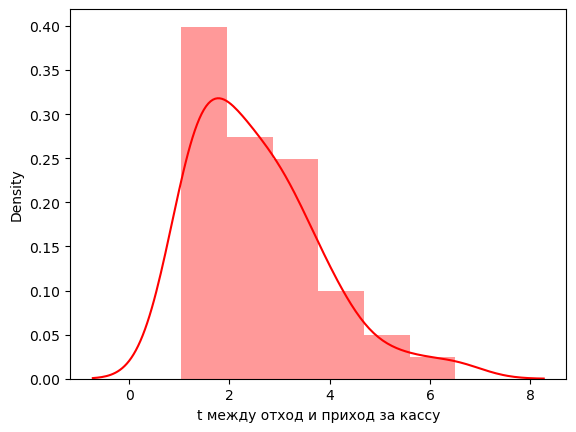

In [41]:
sns_plot = sns.distplot(df_new2['t между отход и приход за кассу'], color='red')


G:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


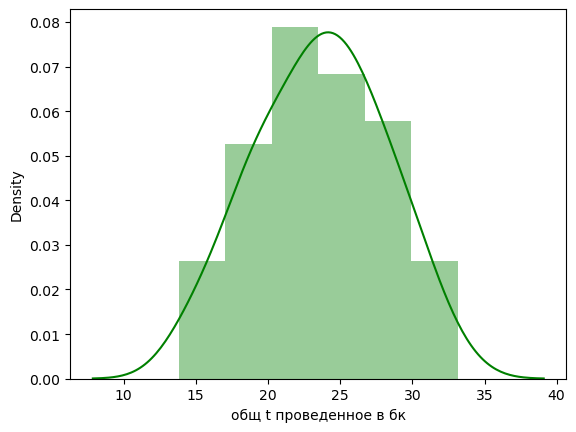

In [42]:
sns_plot = sns.distplot(df['общ t проведенное в бк'], color='green')


G:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


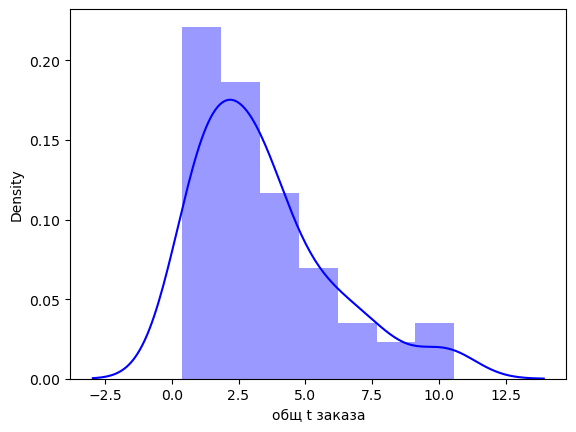

In [43]:
sns_plot = sns.distplot(df['общ t заказа'], color='blue')


G:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


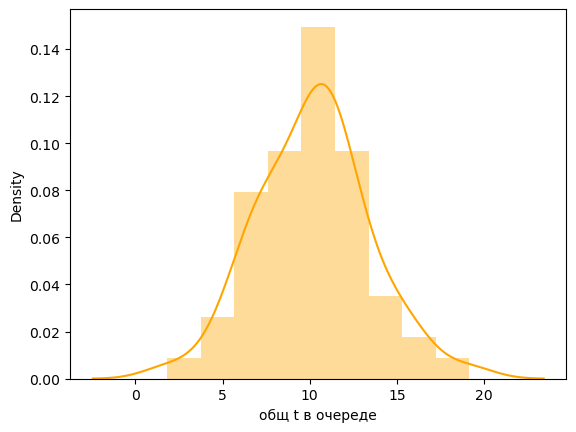

In [44]:
sns_plot = sns.distplot(df['общ t в очереде'],color='orange')

## Распределение Пуасонна

In [24]:
x_1 = poisson.rvs(mu=m1, size=59)
print('Вероятность что t между отход и приход за кассу будет < 2 или меньше: ',poisson.cdf(k=1, mu=m1))
print('Вероятность что t между отход и приход за кассу будет > 2 или больше: ', poisson.cdf(k=3, mu=m1))

print('\n')

x_2 = poisson.rvs(mu=m1, size=59)
print('Вероятность что общ t проведенное в бк будет < 19 или меньше: ', poisson.cdf(k=19, mu=m2))
print('Вероятность что общ t проведенное в бк будет > 23 или больше: ', poisson.cdf(k=23, mu=m2))


print('\n')
x_3 = poisson.rvs(mu=m2, size=59)
print('Вероятность что общ t заказа будет < 2 или меньше: ', poisson.cdf(k=2, mu=m3))
print('Вероятность что общ t заказа будет > 4 или больше: ', poisson.cdf(k=4, mu=m3))

print('\n')
x_4 = poisson.rvs(mu=m4, size=59)
print('Вероятность что общ t в очереде будет < 1 или меньше: ', poisson.cdf(k=6, mu=m4))
print('Вероятность что общ t в очереде будет > 21 или больше: ', poisson.cdf(k=15, mu=m4))

Вероятность что t между отход и приход за кассу будет < 2 или меньше:  0.3963792107275509
Вероятность что t между отход и приход за кассу будет > 2 или больше:  0.8505902031898408


Вероятность что общ t проведенное в бк будет < 19 или меньше:  0.20253762425637242
Вероятность что общ t проведенное в бк будет > 23 или больше:  0.5064411142626898


Вероятность что общ t заказа будет < 2 или меньше:  0.3343613806830798
Вероятность что общ t заказа будет > 4 или больше:  0.7389575797619542


Вероятность что общ t в очереде будет < 1 или меньше:  0.11844343810187387
Вероятность что общ t в очереде будет > 21 или больше:  0.9442379622885838


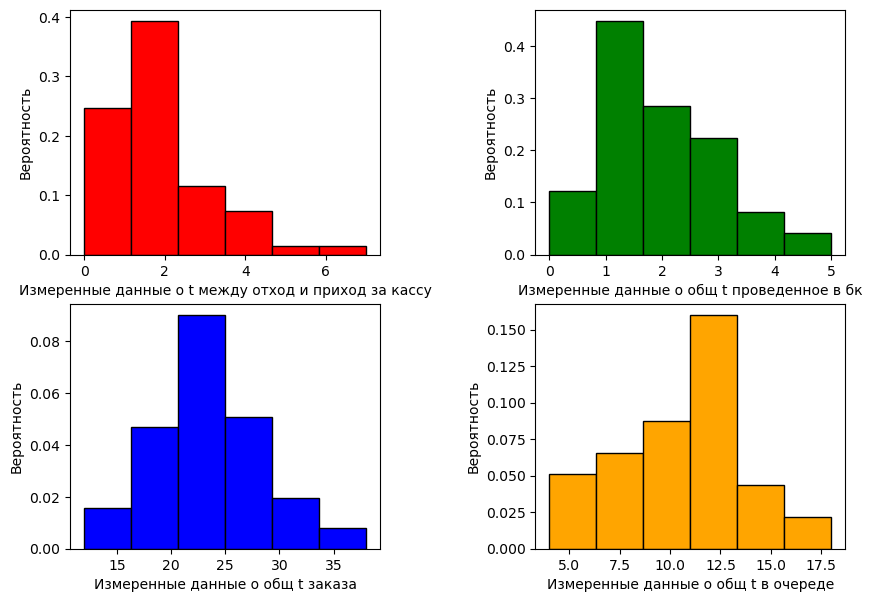

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].hist(x_1, density= True , edgecolor='black', color="red", bins=6)
ax[0][0].set_xlabel('Измеренные данные о t между отход и приход за кассу')
ax[0][0].set_ylabel('Вероятность')
#ax[0][0].axis([0, 5])

ax[0][1].hist(x_2, density= True , edgecolor='black', color="green", bins=6)
ax[0][1].set_xlabel('Измеренные данные о общ t проведенное в бк')
ax[0][1].set_ylabel('Вероятность')

ax[1][0].hist(x_3, density= True , edgecolor='black', color="blue", bins=6)
ax[1][0].set_xlabel('Измеренные данные о общ t заказа')
ax[1][0].set_ylabel('Вероятность')

ax[1][1].hist(x_4, density= True , edgecolor='black', color="orange", bins=6)
ax[1][1].set_xlabel('Измеренные данные о общ t в очереде')
ax[1][1].set_ylabel('Вероятность')


fig.set_size_inches(10, 7)
fig.subplots_adjust(wspace=0.5)
plt.show()

## Доверительный интервал

Confidence Interval = x(+/-)t*(s/√n) - **Формула для нахождения**

In [26]:
C_I_1 = st.t.interval(alpha=0.90, df=len(df['t между отход и приход за кассу'])-1,
              loc=np.mean(df['t между отход и приход за кассу']),
              scale=st.sem(df['t между отход и приход за кассу']))

C_I_2 = st.t.interval(alpha=0.90, df=len(df['общ t проведенное в бк'])-1,
              loc=np.mean(df['общ t проведенное в бк']),
              scale=st.sem(df['общ t проведенное в бк']))

C_I_3 = st.t.interval(alpha=0.90, df=len(df['общ t заказа'])-1,
              loc=np.mean(df['общ t заказа']),
              scale=st.sem(df['общ t заказа']))

C_I_4 = st.t.interval(alpha=0.90, df=len(df['общ t в очереде'])-1,
              loc=np.mean(df['общ t в очереде']),
              scale=st.sem(df['общ t в очереде']))


print('Доверительный интервал для [t между отход и приход за кассу]: ', C_I_1, '\n')
print('Доверительный интервал для [общ t проведенное в бк]: ', C_I_2, '\n')
print('Доверительный интервал для [общ t заказа]: ', C_I_3, '\n')
print('Доверительный интервал для [общ t в очереде]: ', C_I_4, '\n')

Доверительный интервал для [t между отход и приход за кассу]:  (1.7321142623705066, 2.3396614134358806) 

Доверительный интервал для [общ t проведенное в бк]:  (22.612181257508716, 24.566081981850473) 

Доверительный интервал для [общ t заказа]:  (2.8793096394962454, 3.9767796728474676) 

Доверительный интервал для [общ t в очереде]:  (9.494607666810321, 10.891063321724808) 



C:\Users\Кирилл\AppData\Local\Temp\ipykernel_11260\3239358062.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  C_I_1 = st.t.interval(alpha=0.90, df=len(df['t между отход и приход за кассу'])-1,
C:\Users\Кирилл\AppData\Local\Temp\ipykernel_11260\3239358062.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  C_I_2 = st.t.interval(alpha=0.90, df=len(df['общ t проведенное в бк'])-1,
C:\Users\Кирилл\AppData\Local\Temp\ipykernel_11260\3239358062.py:9: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  C_I_3 = st.t.interval(alpha=0.90, df=len(df['общ t заказа'])-1,
C:\Users\Кирилл\AppData\Local\Temp\ipykernel_11260\3239358062.py:13: DeprecationWarnin

## Мода

In [27]:
print('Мода M0 для t между отход и приход за кассу:',np.max(df['t между отход и приход за кассу']))
print('Мода M0 = для общ t проведенное в бк:',np.max(df['общ t проведенное в бк']))
print('Мода M0 = для общ t заказа:',np.max(df['общ t заказа']))
print('Мода M0 = для общ t в очереде:',np.max(df['общ t в очереде']))


Мода M0 для t между отход и приход за кассу: 6.503840272991324
Мода M0 = для общ t проведенное в бк: 33.14424700875201
Мода M0 = для общ t заказа: 10.580545501127148
Мода M0 = для общ t в очереде: 19.16022226672008


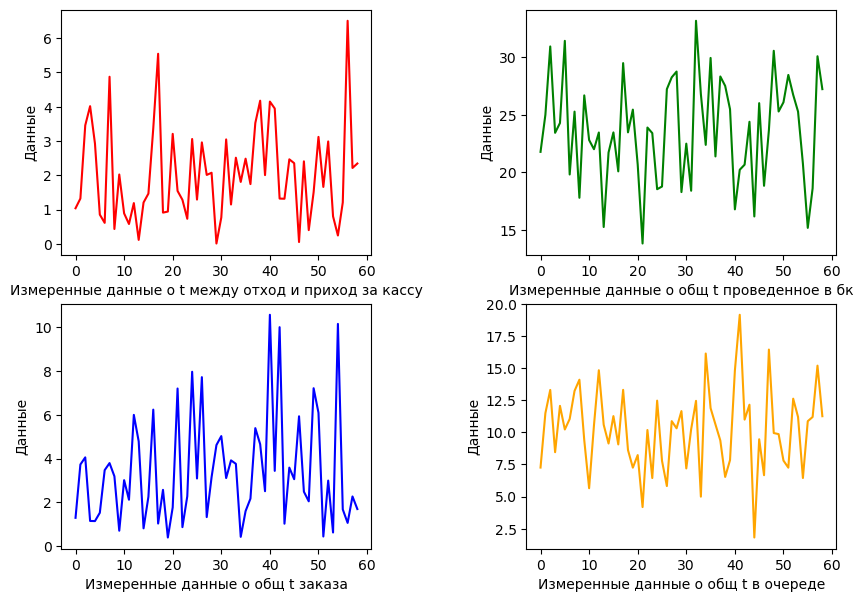

In [28]:
#plt.plot(df['общ t в очереде'])

fig, ax = plt.subplots(nrows=2, ncols=2)

y = np.arange(0, 59)

ax[0][0].plot(df['t между отход и приход за кассу'], color="red")
ax[0][0].set_xlabel('Измеренные данные о t между отход и приход за кассу')
ax[0][0].set_ylabel('Данные')


ax[0][1].plot(df['общ t проведенное в бк'], color="green")
ax[0][1].set_xlabel('Измеренные данные о общ t проведенное в бк')
ax[0][1].set_ylabel('Данные')

ax[1][0].plot(df['общ t заказа'], color="blue")
ax[1][0].set_xlabel('Измеренные данные о общ t заказа')
ax[1][0].set_ylabel('Данные')

ax[1][1].plot(df['общ t в очереде'], color="orange")
ax[1][1].set_xlabel('Измеренные данные о общ t в очереде')
ax[1][1].set_ylabel('Данные')


fig.set_size_inches(10, 7)
fig.subplots_adjust(wspace=0.5)
plt.show()

## Медианна


In [29]:
me1 = statistics.median(df['t между отход и приход за кассу'])
me2 = statistics.median(df['общ t проведенное в бк'])
me3 = statistics.median(df['общ t заказа'])
me4 = statistics.median(df['общ t в очереде'])

print('Медиана для [t между отход и приход за кассу]:',me1)
print('Медиана для [общ t проведенное в бк]:',me2)
print('Медиана для [общ t заказа]:',me3)
print('Медиана для [общ t в очереде]:',me4)

Медиана для [t между отход и приход за кассу]: 1.7426744942362065
Медиана для [общ t проведенное в бк]: 23.46856508241467
Медиана для [общ t заказа]: 3.01513164230198
Медиана для [общ t в очереде]: 10.319103483849048


## По хи квадрату 

**Проверить со значениями Шапиро**

In [47]:
stolb1 = df1
stolb2 = df2
stolb3 = df3
stolb4 = df4


In [48]:
xikk1 = sc.stats.normaltest(stolb1)
xikk2 = sc.stats.normaltest(stolb2)
xikk3 = sc.stats.normaltest(stolb3)
xikk4 = sc.stats.normaltest(stolb4)
print(xikk1)
print(xikk2)
print(xikk3)
print(xikk4)

NormaltestResult(statistic=11.149367305098998, pvalue=0.0037926751955199697)
NormaltestResult(statistic=1.270056284233392, pvalue=0.5299205750210618)
NormaltestResult(statistic=5.561109977433288, pvalue=0.06200408625831626)
NormaltestResult(statistic=1.1228881658148888, pvalue=0.5703847859092194)


**Значения**

In [49]:
print('Мат ожидание',m1, m2, m3, m4)
print('Среднее отклонение', srz1, srz2, srz3, srz4)

Мат ожидание 2.0358878379031933 23.589131619679595 3.428044656171858 10.192835494267563
Среднее отклонение 1.3840248894286893 4.451090305039968 2.5000954064169147 3.1812006360262206


In [50]:
pi = math.pi
ex = math.e
ex

2.718281828459045

In [51]:
np.max(stolb1)

6.503840272991324

## Большое F(x)

In [52]:
v1_1 = stolb1.loc[(stolb1 > 1) & (stolb1 < 1.3)]
v1_2 = stolb1.loc[(stolb1 > 2) & (stolb1 < 2.4)]
v1_3 = stolb1.loc[(stolb1 > 3) & (stolb1 < 3.5)]
v1_4 = stolb1.loc[(stolb1 > 3.5) & (stolb1 < 4.2)]
v1_5 = stolb1.loc[(stolb1 > 4) & (stolb1 < 5.6)]


v2_1 = stolb2.loc[(stolb2 > 14) & (stolb2 < 18)]
v2_2 = stolb2.loc[(stolb2 > 17) & (stolb2 < 19)]
v2_3 = stolb2.loc[(stolb2 > 20) & (stolb2 < 22)]
v2_4 = stolb2.loc[(stolb2 > 23.5) & (stolb2 < 25.4)]
v2_5 = stolb2.loc[(stolb2 > 25) & (stolb2 < 26.5)]

v3_1 = stolb3.loc[(stolb3 > 1) & (stolb3 < 1.6)]
v3_2 = stolb3.loc[(stolb3 > 2.2) & (stolb3 < 3)]
v3_3 = stolb3.loc[(stolb3 > 2.8) & (stolb3 < 4.5)]
v3_4 = stolb3.loc[(stolb3 > 4.5) & (stolb3 < 6)]
v3_5 = stolb3.loc[(stolb3 > 6) & (stolb3 < 8)]



v4_1 = stolb4.loc[(stolb4 > 2) & (stolb4 < 5)]
v4_2 = stolb4.loc[(stolb4 > 5) & (stolb4 < 6)]
v4_3 = stolb4.loc[(stolb4 > 7.5) & (stolb4 < 8)]
v4_4 = stolb4.loc[(stolb4 > 8) & (stolb4 < 11)]
v4_5 = stolb4.loc[(stolb4 > 11) & (stolb4 < 14)]




In [53]:
m2


23.589131619679595

In [54]:
d2

19.812204903620795

In [55]:
srz2

4.451090305039968

In [56]:
v2_1

8     17.792451
13    15.257531
40    16.788861
44    16.173113
55    15.182660
Name: общ t проведенное в бк, dtype: float64

In [57]:
len(v2_1)

5

In [60]:
v2_1

8     17.792451
13    15.257531
40    16.788861
44    16.173113
55    15.182660
Name: общ t проведенное в бк, dtype: float64

Для 1 выборки

In [58]:
fn2_1 = (15 - m2)/srz2
fk2_1 = (17 - m2)/srz2

pteor2_1 = fk2_1-fn2_1


nteor2_1 = 59*pteor2_1

xnabl2_1 = ((5-nteor2_1)**2)/(nteor2_1)

xnabl2_1

17.45338617384117

In [59]:
len(v2_2)

7

In [139]:
fn2_2 = (17 - m2)/srz2
fk2_2 = (18 - m2)/srz2

pteor2_2 = fk2_2-fn2_2


nteor2_2 = 59*pteor2_2

xnabl2_2 = ((7-nteor2_2)**2)/(nteor2_2)

xnabl2_2

2.951847502860556

In [141]:
len(v2_3)

8

In [142]:
fn2_3 = (20 - m2)/srz2
fk2_3 = (21 - m2)/srz2

pteor2_3 = fk2_3-fn2_3

nteor2_3 = 59*pteor2_3

xnabl2_3 = ((8-nteor2_3)**2)/(nteor2_3)

xnabl2_3

2.0834806312605525

In [144]:
len(v2_4)

8

In [146]:
fn2_4 = (23 - m2)/srz2
fk2_4 = (25 - m2)/srz2

pteor2_4 = fk2_4-fn2_4

nteor2_4 = 59*pteor2_4

xnabl2_4 = ((8-nteor2_4)**2)/(nteor2_4)

xnabl2_4

12.924509240761152

In [151]:
len(v2_5)

7

In [150]:
v2_5

7     25.266167
19    25.438080
39    25.473559
45    26.000131
49    25.277034
50    26.075889
53    25.268593
Name: общ t проведенное в бк, dtype: float64

In [154]:
fn2_5 = (25 - m2)/srz2
fk2_5 = (26 - m2)/srz2

pteor2_5 = fk2_5-fn2_5

nteor2_5 = 59*pteor2_5

xnabl2_5 = ((7-nteor2_5)**2)/(nteor2_5)

xnabl2_5

2.951847502860561

In [160]:
len(v2_5
   )

7

In [165]:
xnabl2_1 = ((5-nteor2_1)**2)/(nteor2_1)
xnabl2_2 = ((7-nteor2_2)**2)/(nteor2_2)
xnabl2_3 = ((8-nteor2_3)**2)/(nteor2_3)
xnabl2_4 = ((8-nteor2_4)**2)/(nteor2_4)
xnabl2_5 = ((7-nteor2_5)**2)/(nteor2_5)

xnabsh2 = xnabl2_1 + xnabl2_2 + xnabl2_3 + xnabl2_4 + xnabl2_5 
print(xkrit2, 'И', xnabsh2)

7.8 И 38.36507105158399


In [192]:
len(v2_1)

5

In [169]:
print(min(v4_1),max(v4_1), )

4.994849288913184 19.16022226672008


In [200]:
len(v4_1)

45

In [ ]:
stolb1

In [205]:
np.sort(stolb4)

array([ 1.81326976,  4.18372201,  4.99484929,  5.65147076,  5.82116757,
        6.4449544 ,  6.44729492,  6.52959695,  6.665082  ,  7.1933726 ,
        7.25238608,  7.25368258,  7.26094797,  7.79272841,  7.80411959,
        7.84179014,  8.23300719,  8.45678384,  8.62642956,  9.06412145,
        9.13333002,  9.37406044,  9.39179093,  9.46442254,  9.86477309,
        9.94921965, 10.18483247, 10.22806586, 10.24784628, 10.31910348,
       10.56070928, 10.59460806, 10.6224525 , 10.8731784 , 10.87637743,
       10.99530957, 11.04447298, 11.19870381, 11.20088382, 11.26063871,
       11.2696241 , 11.49885318, 11.65924473, 11.88805734, 12.06716509,
       12.15634492, 12.45650952, 12.47324041, 12.62455002, 13.23015939,
       13.30693099, 13.31381177, 14.10339466, 14.8209338 , 14.84110388,
       15.19843543, 16.14259715, 16.45055912, 19.16022227])

In [223]:
len(v4_2)

2

In [222]:
fn4_1 = (0 - m4)/srz4
fk4_1 = (5 - m4)/srz4

pteor4_1 = fk4_1-fn4_1


nteor4_1 = 59*pteor4_1

xnabl4_1 = ((2-nteor4_1)**2)/(nteor4_1)

xnabl4_1

88.775418659524

In [175]:
print(min(v4_2),max(v4_2), )

5.651470763806488 19.16022226672008


In [225]:
len(v4_2)

2

In [224]:
fn4_2 = (5 - m4)/srz4
fk4_2 = (7 - m4)/srz4

pteor4_2 = fk4_2-fn4_2


nteor4_2 = 59*pteor4_2

xnabl4_2 = ((2-nteor4_2)**2)/(nteor4_2)

xnabl4_2

33.20075080395407

In [178]:
print(min(v4_3),max(v4_3) )

7.792728409684383 19.16022226672008


In [226]:
len(v4_3)

3

In [209]:
v4_3

25    7.792728
39    7.841790
50    7.804120
Name: общ t в очереде, dtype: float64

In [227]:
fn4_3 = (7 - m4)/srz4
fk4_3 = (8 - m4)/srz4

pteor4_3 = fk4_3-fn4_3


nteor4_3 = 59*pteor4_3

xnabl4_3 = ((3-nteor4_3)**2)/(nteor4_3)

xnabl4_3

13.031724640760254

In [212]:
print(min(v4_4),max(v4_4) )

8.233007188982183 10.99530957201199


In [228]:
len(v4_4)

20

In [211]:
v4_4

3      8.456784
5     10.228066
9      9.391791
11    10.560709
13    10.594608
14     9.133330
16     9.064121
18     8.626430
20     8.233007
22    10.184832
27    10.876377
28    10.319103
31    10.247846
36    10.622453
37     9.374060
42    10.995310
45     9.464423
48     9.949220
49     9.864773
55    10.873178
Name: общ t в очереде, dtype: float64

In [229]:
fn4_4 = (8 - m4)/srz4
fk4_4 = (11 - m4)/srz4

pteor4_4 = fk4_4-fn4_4


nteor4_4 = 59*pteor4_4

xnabl4_4 = ((20-nteor4_4)**2)/(nteor4_4)

xnabl4_4

22.828524221107685

In [213]:
print(min(v4_5),max(v4_5) )

11.044472981953525 13.313811773900404


In [230]:
len(v4_5)

16

In [231]:
fn4_5 = (11 - m4)/srz4
fk4_5 = (14 - m4)/srz4

pteor4_5 = fk4_5-fn4_5


nteor4_5 = 59*pteor4_5

xnabl4_5 = ((16-nteor4_5)**2)/(nteor4_5)

xnabl4_5

28.24042878840839

In [232]:
xnabl4_1 = ((5-xnabl4_1)**2)/(xnabl4_1)
xnabl4_2 = ((7-xnabl4_2)**2)/(xnabl4_2)
xnabl4_3 = ((8-xnabl4_3)**2)/(xnabl4_3)
xnabl4_4 = ((8-xnabl4_4)**2)/(xnabl4_4)
xnabl4_5 = ((7-xnabl4_5)**2)/(xnabl4_5)

xnabsh4 = xnabl4_1 + xnabl4_2 +  xnabl4_3 +  xnabl4_4 +  xnabl4_5
print(xkrit4, 'И', xnabsh4)

7.8 И 127.28403025433833


In [ ]:
ni - это количсество по гист

**1 по хи квадрату**

In [58]:
len(v1_1)

NameError: name 'v1_1' is not defined

In [59]:
v1_1 = stolb1.loc[(stolb1 > 1) & (stolb1 < 1.3)]
v1_2 = stolb1.loc[(stolb1 > 2) & (stolb1 < 2.4)]
v1_3 = stolb1.loc[(stolb1 > 3) & (stolb1 < 3.5)]
v1_4 = stolb1.loc[(stolb1 > 3.5) & (stolb1 < 4.2)]
v1_5 = stolb1.loc[(stolb1 > 4) & (stolb1 < 5.6)]


v2_1 = stolb2.loc[(stolb2 > 14) & (stolb2 < 18)]
v2_2 = stolb2.loc[(stolb2 > 17) & (stolb2 < 19)]
v2_3 = stolb2.loc[(stolb2 > 20) & (stolb2 < 22)]
v2_4 = stolb2.loc[(stolb2 > 23.5) & (stolb2 < 25.4)]
v2_5 = stolb2.loc[(stolb2 > 25) & (stolb2 < 26.5)]

v3_1 = stolb3.loc[(stolb3 > 1) & (stolb3 < 1.6)]
v3_2 = stolb3.loc[(stolb3 > 2.2) & (stolb3 < 3)]
v3_3 = stolb3.loc[(stolb3 > 2.8) & (stolb3 < 4.5)]
v3_4 = stolb3.loc[(stolb3 > 4.5) & (stolb3 < 6)]
v3_5 = stolb3.loc[(stolb3 > 6) & (stolb3 < 8)]



v4_1 = stolb4.loc[(stolb4 > 2) & (stolb3 < 5)]
v4_2 = stolb4.loc[(stolb4 > 5) & (stolb3 < 6)]
v4_3 = stolb4.loc[(stolb4 > 7.5) & (stolb3 < 8)]
v4_4 = stolb4.loc[(stolb4 > 8) & (stolb3 < 11)]
v4_5 = stolb4.loc[(stolb4 > 11) & (stolb3 < 14)]


**Общее число случаев - n**

In [60]:
n1 = len(v1_1) + len(v1_2) + len(v1_3)+ len(v1_4)+ len(v1_5)
n2 = len(v2_1) + len(v2_2) + len(v2_3)+ len(v2_4)+ len(v2_5)
n3 = len(v3_1) + len(v3_2) + len(v3_3)+ len(v3_4)+ len(v3_5)
n4 = len(v4_1) + len(v4_2) + len(v4_3)+ len(v4_4)+ len(v4_5)

i1_1 = statistics.median(v1_1)
i1_2 = statistics.median(v1_2)
i1_3 = statistics.median(v1_3)
i1_4 = statistics.median(v1_4)
i1_5 = statistics.median(v1_5)

i2_1 = statistics.median(v2_1)
i2_2 = statistics.median(v2_2)
i2_3 = statistics.median(v2_3)
i2_4 = statistics.median(v2_4)
i2_5 = statistics.median(v2_5)

i3_1 = statistics.median(v3_1)
i3_2 = statistics.median(v3_2)
i3_3 = statistics.median(v3_3)
i3_4 = statistics.median(v3_4)
i3_5 = statistics.median(v3_5)

i4_1 = statistics.median(v4_1)
i4_2 = statistics.median(v4_2)
i4_3 = statistics.median(v4_3)
i4_4 = statistics.median(v4_4)
i4_5 = statistics.median(v4_5)


k =  5 - 2



xs1 = ((len(v1_1)*0 + len(v1_2)*1 + len(v1_3)*2 + len(v1_4)*3 + len(v1_5)*4))/n1

i1_1

1.2063327885306019

In [82]:
i1_1

1.2063327885306019

In [79]:
m1

2.0358878379031933

In [62]:
pit0 = (m1**i1_1 * 2.718**(-1*(m1)))/(1.105)
pit1 = (m1**i1_2 * 2.718**(-1*(m1)))/(2.139)
pit2 = (m1**i1_3 * 2.718**(-1*(m1)))/(7.36)
pit3 = (m1**i1_4 * 2.718**(-1*(m1)))/(24.512)
pit4 = (m1**i1_5 * 2.718**(-1*(m1)))/(31.246)

ni1 = len(v1_1)
ni2 = len(v1_2)
ni3 = len(v1_3)
ni4 = len(v1_4)
ni5 = len(v1_5)

n1_1 = n1 * pit0 # ni'
n1_2 = n1 * pit1
n1_3 = n1 * pit2
n1_4 = n1 * pit3
n1_5 = n1 * pit4

xnab1 = ((ni1-n1_1)**2)/n1_1
xnab2 = ((ni2-n1_2)**2)/n1_2
xnab3 = ((ni3-n1_3)**2)/n1_3
xnab4 = ((ni4-n1_4)**2)/n1_4
xnab5 = ((ni5-n1_5)**2)/n1_5

xnabl1 = xnab1+xnab2+xnab3+xnab4+xnab5

xkrit1 = 7.8
print('Хнабл > Xкрит - Нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnabl1 ,'<', xkrit1)
print(xnabl1 < xkrit1)

Хнабл > Xкрит - Нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

5.006364045266183 < 7.8
True


In [63]:
pit10 = (m1**0 * 2.718**(-1*(m1)))/(1)
pit11 = (m1**1 * 2.718**(-1*(m1)))/(1)
pit12 = (m1**2 * 2.718**(-1*(m1)))/(2)
pit13 = (m1**3 * 2.718**(-1*(m1)))/(6)
pit14 = (m1**4 * 2.718**(-1*(m1)))/(24)

ni1 = len(v1_1)
ni2 = len(v1_2)
ni3 = len(v1_3)
ni4 = len(v1_4)
ni5 = len(v1_5)

n1_1 = n1 * pit10 # ni'
n1_2 = n1 * pit11
n1_3 = n1 * pit12
n1_4 = n1 * pit13
n1_5 = n1 * pit14

xnab11 = ((ni1-n1_1)**2)/n1_1
xnab12 = ((ni2-n1_2)**2)/n1_2
xnab13 = ((ni3-n1_3)**2)/n1_3
xnab14 = ((ni4-n1_4)**2)/n1_4
xnab15 = ((ni5-n1_5)**2)/n1_5

xnabl1 = xnab11+xnab12+xnab13+xnab14+xnab15

xkrit1 = 7.8
print('Хнабл > Xкрит - Нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnabl1 ,'<', xkrit1)
print(xnabl1 < xkrit1)

Хнабл > Xкрит - Нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

4.86364560690155 < 7.8
True


**2 по хи квадрату**

In [64]:
ui2 = (v1_2 - m2)/srz2
ui2 = statistics.stdev(ui2)


fb = по тпбл лапласса 
fi2 = (1/math.sqrt(2*3.14)) * (2.718**(((-1*ui2)**2)/2))
nis2 = ((59*2) / srz2) * fi2


xnab2 = ((13-nis2)**2)/nis2
xkrit2 = 9.5
print('Хнабл > Xкрит - Пуасонсое распределение')
print('Хнабл < Xкрит - нормальное распределение', '\n')
print(xnab2 ,'<', xkrit2)
print(xnab2 < xkrit2)

Хнабл > Xкрит - Пуасонсое распределение
Хнабл < Xкрит - нормальное распределение 

0.550873273357253 < 9.5
True


In [65]:
i2_5

25.438080428934093

In [66]:
pit20 = (m2**i2_1 * 2.718**(-1*(m2)))/(34013255210612.426)
pit21 = (m2**i2_2 * 2.718**(-1*(m2)))/(30825681155451670.899)
pit22 = (m2**i2_3 * 2.718**(-1*(m2)))/(21027057341248831176.259)
pit23 = (m2**i2_4 * 2.718**(-1*(m2)))/(5639329663689413784978530.507)
pit24 = (m2**i2_4 * 2.718**(-1*(m2)))/(64320090438183189127012999.064)

print(pit20)
ni1 = len(v2_1)
ni2 = len(v2_2)
ni3 = len(v2_3)
ni4 = len(v2_4)
ni5 = len(v2_5)

n2_1 = n2 * pit20 # ni'
n2_2 = n2 * pit21
n2_3 = n2 * pit22
n2_4 = n2 * pit23
n2_5 = n2 * pit24

xnab21 = ((ni1-n2_1)**2)/n2_1
xnab22 = ((ni2-n2_2)**2)/n2_2
xnab23 = ((ni3-n2_3)**2)/n2_3
xnab24 = ((ni4-n2_4)**2)/n2_4
xnab25 = ((ni5-n2_5)**2)/n2_5

xnabl2 = xnab21+xnab22+xnab23+xnab24+xnab25

xkrit2 = 7.8
print('Хнабл > Xкрит - Нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnabl2 ,'>', xkrit2)
print(xnabl2 > xkrit2)


0.02665691959607967
Хнабл > Xкрит - Нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

244.54223351057692 > 7.8
True


In [67]:
pit20 = (m2**0 * 2.718**(-1*(m2)))/(1)
pit21 = (m2**1 * 2.718**(-1*(m2)))/(1)
pit22 = (m2**2 * 2.718**(-1*(m2)))/(2)
pit23 = (m2**3 * 2.718**(-1*(m2)))/(6)
pit24 = (m2**4 * 2.718**(-1*(m2)))/(24)


ni1 = len(v2_1)
ni2 = len(v2_2)
ni3 = len(v2_3)
ni4 = len(v2_4)
ni5 = len(v2_5)

n2_1 = n2 * pit20 # ni'
n2_2 = n2 * pit21
n2_3 = n2 * pit22
n2_4 = n2 * pit23
n2_5 = n2 * pit24

xnab21 = ((ni1-n2_1)**2)/n2_1
xnab22 = ((ni2-n2_2)**2)/n2_2
xnab23 = ((ni3-n2_3)**2)/n2_3
xnab24 = ((ni4-n2_4)**2)/n2_4
xnab25 = ((ni5-n2_5)**2)/n2_5

xnabl2 = xnab21+xnab22+xnab23+xnab24+xnab25

xkrit2 = 7.8
print('Хнабл > Xкрит - Нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnabl2 ,'>', xkrit2)
print(xnabl2 > xkrit2)


Хнабл > Xкрит - Нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

13686830783.920233 > 7.8
True


**3 по хи квадрату**

In [68]:
v1_3

2     3.455660
16    3.368538
20    3.207091
24    3.057019
31    3.044953
50    3.118594
Name: t между отход и приход за кассу, dtype: float64

In [69]:
ui3 = (v1_3 - m3)/srz3
pit3 = (m3**6) *(2.71**(-1*(m3)))/720
nis3 = 59*pit3

xnab3 = ((6-nis3)**2)/nis3
xkrit3 = 11.1
print('Хнабл > Xкрит - нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnab3 ,'<', xkrit3)
print(xnab3 < xkrit3)

Хнабл > Xкрит - нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

0.6162188381528761 < 11.1
True


In [86]:
n3_1

1.395860252727177

In [70]:
pit30 = (m3**i3_1 * 2.718**(-1*(m3)))/(1.282)
pit31 = (m3**i3_2 * 2.718**(-1*(m3)))/(3.272)
pit32 = (m3**i3_3 * 2.718**(-1*(m3)))/(10.691)
pit33 = (m3**i3_4 * 2.718**(-1*(m3)))/(102.821)
pit34 = (m3**i3_5 * 2.718**(-1*(m3)))/(7671.18)


ni1 = len(v3_1)
ni2 = len(v3_2)
ni3 = len(v3_3)
ni4 = len(v3_4)
ni5 = len(v3_5)

n3_1 = n3 * pit30 # ni'
n3_2 = n3 * pit31
n3_3 = n3 * pit32
n3_4 = n3 * pit33
n3_5 = n3 * pit34

xnab31 = ((ni1-n3_1)**2)/n3_1
xnab32 = ((ni2-n3_2)**2)/n3_2
xnab33 = ((ni3-n3_3)**2)/n3_3
xnab34 = ((ni4-n3_4)**2)/n3_4
xnab35 = ((ni5-n3_5)**2)/n3_5

xnabl3 = xnab31+xnab32+xnab33+xnab34+xnab35

xkrit3 = 7.8
print('Хнабл > Xкрит - Нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnabl3 ,'>', xkrit3)
print(xnabl3 > xkrit3)


Хнабл > Xкрит - Нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

32.04861687581856 > 7.8
True


In [71]:
v3_4

13    4.788861
29    4.620703
30    5.029857
37    5.395022
38    4.659377
46    5.936616
Name: общ t заказа, dtype: float64

In [72]:
pit30 = (m3**0 * 2.718**(-1*(m3)))/(1)
pit31 = (m3**1 * 2.718**(-1*(m3)))/(1)
pit32 = (m3**2 * 2.718**(-1*(m3)))/(2)
pit33 = (m3**3 * 2.718**(-1*(m3)))/(6)
pit34 = (m3**4 * 2.718**(-1*(m3)))/(24)


ni1 = len(v3_1)
ni2 = len(v3_2)
ni3 = len(v3_3)
ni4 = len(v3_4)
ni5 = len(v3_5)

n3_1 = n3 * pit30 # ni'
n3_2 = n3 * pit31
n3_3 = n3 * pit32
n3_4 = n3 * pit33
n3_5 = n3 * pit34

xnab31 = ((ni1-n3_1)**2)/n3_1
xnab32 = ((ni2-n3_2)**2)/n3_2
xnab33 = ((ni3-n3_3)**2)/n3_3
xnab34 = ((ni4-n3_4)**2)/n3_4
xnab35 = ((ni5-n3_5)**2)/n3_5

xnabl3 = xnab31+xnab32+xnab33+xnab34+xnab35

xkrit3 = 7.8
print('Хнабл > Xкрит - Нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnabl3 ,'>', xkrit3)
print(xnabl3 > xkrit3)


Хнабл > Xкрит - Нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

39.251735222231986 > 7.8
True


**4 по хи квадрату**

In [73]:
ui4 = (v1_4 - m4)/srz4
ui4 = statistics.stdev(ui4)

fi4 = (1/math.sqrt(2*3.14)) * (2.718**(((-1*ui4)**2)/2))
nis4 = ((59*5) / srz4) * fi4


xnab4 = ((43-nis4)**2)/nis4
xkrit4 = 9.5
print('Хнабл > Xкрит - Пуасонсое распределение')
print('Хнабл < Xкрит - нормальное распределение', '\n')
print(xnab4 ,'<', xkrit4)
print(xnab4 < xkrit4)

Хнабл > Xкрит - Пуасонсое распределение
Хнабл < Xкрит - нормальное распределение 

0.9279782951541518 < 9.5
True


In [74]:
pit40 = (m4**0 * 2.718**(-1*(m4)))/(1)
pit41 = (m4**1 * 2.718**(-1*(m4)))/(1)
pit42 = (m4**2 * 2.718**(-1*(m4)))/(2)
pit43 = (m4**3 * 2.718**(-1*(m4)))/(6)
pit44 = (m4**4 * 2.718**(-1*(m4)))/(24)

print(pit40)
ni1 = len(v4_1)
ni2 = len(v4_2)
ni3 = len(v4_3)
ni4 = len(v4_4)
ni5 = len(v4_5)

n4_1 = n4 * pit40 # ni'
n4_2 = n4 * pit41
n4_3 = n4 * pit42
n4_4 = n4 * pit43
n4_5 = n4 * pit44

xnab41 = ((ni1-n4_1)**2)/n4_1
xnab42 = ((ni2-n4_2)**2)/n4_2
xnab43 = ((ni3-n4_3)**2)/n4_3
xnab44 = ((ni4-n4_4)**2)/n4_4
xnab45 = ((ni5-n4_5)**2)/n4_5

xnabl4 = xnab41+xnab42+xnab43+xnab44+xnab45

xkrit4 = 7.8
print('Хнабл > Xкрит - Нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnabl4 ,'>', xkrit4)
print(xnabl4 > xkrit4)


3.74771682322938e-05
Хнабл > Xкрит - Нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

306606.8040377264 > 7.8
True


In [75]:
i4_5

12.464874963396845

In [76]:
pit40 = (m4**i4_1 * 2.718**(-1*(m4)))/(15954623.964)
pit41 = (m4**i4_2 * 2.718**(-1*(m4)))/(14914361.688)
pit42 = (m4**i4_3 * 2.718**(-1*(m4)))/(36203667.391)
pit43 = (m4**i4_4 * 2.718**(-1*(m4)))/(64853966.300)
pit44 = (m4**i4_5 * 2.718**(-1*(m4)))/(1559730645.926)

print(pit40)
ni1 = len(v4_1)
ni2 = len(v4_2)
ni3 = len(v4_3)
ni4 = len(v4_4)
ni5 = len(v4_5)

n4_1 = n4 * pit40 # ni'
n4_2 = n4 * pit41
n4_3 = n4 * pit42
n4_4 = n4 * pit43
n4_5 = n4 * pit44

xnab41 = ((ni1-n4_1)**2)/n4_1
xnab42 = ((ni2-n4_2)**2)/n4_2
xnab43 = ((ni3-n4_3)**2)/n4_3
xnab44 = ((ni4-n4_4)**2)/n4_4
xnab45 = ((ni5-n4_5)**2)/n4_5

xnabl4 = xnab41+xnab42+xnab43+xnab44+xnab45

xkrit4 = 7.8
print('Хнабл > Xкрит - Нормальное распределение')
print('Хнабл < Xкрит - Пуасонсое распределение', '\n')
print(xnabl4 ,'>', xkrit4)
print(xnabl4 > xkrit4)


0.1206274378532712
Хнабл > Xкрит - Нормальное распределение
Хнабл < Xкрит - Пуасонсое распределение 

75.13599908966083 > 7.8
True
